## Flood Prediction

Predicting whether there will be flood or not using classification algorithms: Logistic Regression, Support Vector Machine,
K Nearest Neighbor, Random Forest and Gradient Boosting and determining the algorithm with the optimum performance.

In [1]:
# import libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df = pd.read_csv(r"../data/FloodPred.csv")

In [8]:
df.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,Suncity,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,Suncity,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,Suncity,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,Suncity,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,Suncity,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
5,Suncity,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,NO
6,Suncity,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,YES
7,Suncity,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0,2648.3,NO
8,Suncity,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3,3050.2,YES
9,Suncity,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1,2848.6,NO


In [21]:
df.shape

(118, 16)

In [4]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [3]:
# converting the Class variable
df.FLOODS = df.FLOODS.replace(['YES','NO'],(1,0))

In [13]:
df.FLOODS.unique()

array([1, 0], dtype=int64)

In [4]:
# Removing unecessary features
subData = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS']]

In [15]:
subData

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


In [16]:
# Check data types and structure
subData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JAN               118 non-null    float64
 1   FEB               118 non-null    float64
 2   MAR               118 non-null    float64
 3   APR               118 non-null    float64
 4   MAY               118 non-null    float64
 5   JUN               118 non-null    float64
 6   JUL               118 non-null    float64
 7   AUG               118 non-null    float64
 8   SEP               118 non-null    float64
 9   OCT               118 non-null    float64
 10  NOV               118 non-null    float64
 11  DEC               118 non-null    float64
 12   ANNUAL RAINFALL  118 non-null    float64
 13  FLOODS            118 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 13.0 KB


In [17]:
subData.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085,0.508475
std,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407,0.502060
min,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000,0.000000
25%,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000,0.000000
50%,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000,1.000000
75%,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000,1.000000
max,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000,1.000000


In [5]:
# Split data into X and y

dfArr = subData.values # converting our dataframe into an array
X = dfArr[:, 0:13]
y = dfArr[:, 13]

#### Support Vector Machine

In [6]:
# Seeding, Building and training model
seedSearch= [0,2,4,6,8,12]

for seed1 in seedSearch:
    Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2, random_state=seed1)
    
    svc = SVC(kernel='linear')
    svc.fit(Xtrain, yTrain)
    print(seed1, ":", svc.score(Xtest, yTest))

0 : 1.0
2 : 0.9166666666666666
4 : 0.9583333333333334
6 : 0.9583333333333334
8 : 0.9583333333333334
12 : 0.9583333333333334


In [7]:
Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2, random_state=4)
    
svc = SVC(kernel='linear')
# fit the model
svc.fit(Xtrain, yTrain)

# Predict the performance
y_pred = svc.predict(Xtest)

print(classification_report(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))

SVCAcc = accuracy_score(y_pred,yTest)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       0.91      1.00      0.95        10

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

[[13  1]
 [ 0 10]]
SVC accuracy: 95.83%


Text(33.0, 0.5, 'Actual label')

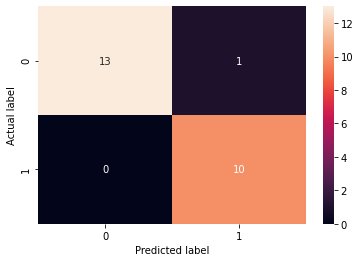

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt

cm = confusion_matrix(yTest, y_pred)
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
We can infer that Support Vector Machine had an optimum performance of 95% with seed size of 4,6,8,12

#### Logistic Regression

In [8]:
# Seeding, Building and Training model

seedSearch= [0,2,4,6,8,12]

for seed2 in seedSearch:
    Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2, random_state=seed2)
    
    LR = LogisticRegression()
    LR.fit(Xtrain,yTrain)
    print(seed2, ":", LR.score(Xtest,yTest))

0 : 0.375
2 : 0.375
4 : 0.5
6 : 0.5416666666666666
8 : 0.625
12 : 0.5416666666666666


In [9]:
Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2, random_state=8)
LR = LogisticRegression()
LR = LR.fit(Xtrain,yTrain)

y_pred = LR.predict(Xtest)

print(classification_report(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))
LRAcc = accuracy_score(y_pred,yTest)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

         0.0       0.78      0.50      0.61        14
         1.0       0.53      0.80      0.64        10

    accuracy                           0.62        24
   macro avg       0.66      0.65      0.62        24
weighted avg       0.68      0.62      0.62        24

[[7 7]
 [2 8]]
LR accuracy: 62.50%


Text(33.0, 0.5, 'Actual label')

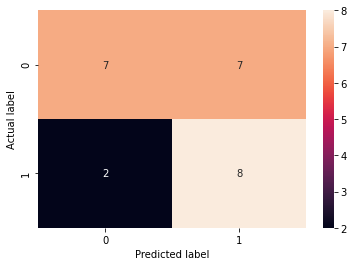

In [24]:
import seaborn as sb
import matplotlib.pyplot as plt

cm = confusion_matrix(yTest, y_pred)
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
We can infer that LogisticRegression has an optimum performance of 62% with seed size of 8.

#### KNN

In [10]:
# Seeding, Building and training model
seedSearch= [0,2,4,6,8,12,14,16]

for seed3 in seedSearch:
    Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2, random_state=seed3)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(Xtrain, yTrain)
    print(seed3, ":", knn.score(Xtest, yTest))

0 : 0.9583333333333334
2 : 1.0
4 : 0.9583333333333334
6 : 0.9166666666666666
8 : 1.0
12 : 0.9166666666666666
14 : 0.875
16 : 0.9583333333333334


In [11]:
Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2, random_state=2)
knn = neighbors.KNeighborsClassifier(n_neighbors=5,)
knn.fit(Xtrain, yTrain)

y_pred = knn.predict(Xtest)

print(classification_report(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))
knnAcc = accuracy_score(y_pred,yTest)
print('KNN accuracy: {:.2f}%'.format(knnAcc*100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        16

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

[[ 8  0]
 [ 0 16]]
KNN accuracy: 100.00%


Text(33.0, 0.5, 'Actual label')

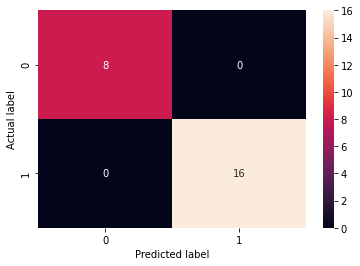

In [26]:
import seaborn as sb
import matplotlib.pyplot as plt

cm = confusion_matrix(yTest, y_pred)
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
We can infer that KNN had an optimum performance of 100% with seed size of 2 

#### RandomForest

In [12]:
# Seeding, Building and Training model

seedSearch= [0,2,4,8,12,42]

for seed4 in seedSearch:
    Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2, random_state=seed4)
    
    RF = RandomForestClassifier(n_estimators=100)
    RF.fit(Xtrain,yTrain)
    print(seed4, ":", RF.score(Xtest,yTest))

0 : 1.0
2 : 1.0
4 : 0.9583333333333334
8 : 0.9583333333333334
12 : 0.9583333333333334
42 : 1.0


In [13]:
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(Xtrain,yTrain)

y_pred = RF.predict(Xtest)

print(classification_report(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))
RFAcc = accuracy_score(y_pred,yTest)
print('RF accuracy: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

[[10  0]
 [ 0 14]]
RF accuracy: 100.00%


Text(33.0, 0.5, 'Actual label')

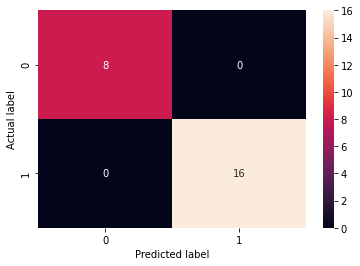

In [28]:
import seaborn as sb
import matplotlib.pyplot as plt

cm = confusion_matrix(yTest, y_pred)
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
We can infer that RF had an optimum performance of 100% with seed size of 0,2 & 42 respectively 

#### Gradient Boosting

In [14]:
# Seeding, Building and training model
seedSearch= [0,2,4,6,8,12]

for seed5 in seedSearch:
    Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2, random_state=seed5)
    
    GB = GradientBoostingClassifier(n_estimators=100)
    GB.fit(Xtrain, yTrain)
    print(seed5, ":", GB.score(Xtest, yTest))

0 : 1.0
2 : 1.0
4 : 0.9583333333333334
6 : 0.9583333333333334
8 : 0.9583333333333334
12 : 0.9166666666666666


In [15]:
Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2, random_state=0)
GB = GradientBoostingClassifier(n_estimators=100)
GB.fit(Xtrain, yTrain)

y_pred = GB.predict(Xtest)

print(classification_report(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))
GBAcc = accuracy_score(y_pred,yTest)
print('GB accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00         8

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

[[16  0]
 [ 0  8]]
GB accuracy: 100.00%


Text(33.0, 0.5, 'Actual label')

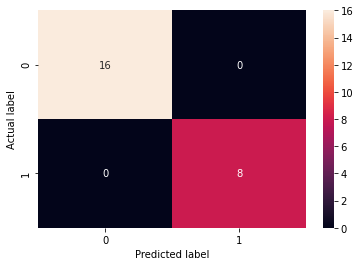

In [30]:
import seaborn as sb
import matplotlib.pyplot as plt

cm = confusion_matrix(yTest, y_pred)
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
We can infer that GB had an optimum performance of 100% with seed size of 0 & 2 respectively 

### Model Comparison

In [18]:
CompAlg = pd.DataFrame({'Model': ['Support Vector Machine', 'Logistic Regression', 'K Nearest Neighbor', 'RandomForest', 
                                  'Gradient Boosting' ],
                        'Accuracy': [SVCAcc*100, LRAcc*100, knnAcc*100, RFAcc*100, GBAcc*100]})
CompAlg.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,K Nearest Neighbor,100.000000
3,RandomForest,100.000000
4,Gradient Boosting,100.000000
0,Support Vector Machine,95.833333
1,Logistic Regression,62.500000


In [ ]:
REPORT

We can infer that Support Vector Machine had an optimum performance of 95% with seed size of 4,6,8,12.
LogisticRegression has an optimum performance of 62% with seed size of 8.
KNN had an optimum performance of 100% with seed size of 2.
RandomForest had an optimum performance of 100% with seed size of 0,2 & 42 respectively.
Gradient Boosting had an optimum performance of 100% with seed size of 0 & 2 respectively.

We can deduce that K Nearest Neighbor, Random Forest and Gradient Boosting had an accuracy of 100% with a sample size of 118.